In [2]:
import csv
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Prepare a classification model using Naive Bayes for salary data 


### Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [3]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [4]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train_data.shape

(30161, 14)

In [6]:
test_data.shape

(15060, 14)

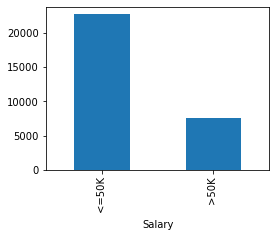

In [8]:
GroupedData=train_data.groupby('Salary').size()
GroupedData.plot(kind='bar', figsize=(4,3))

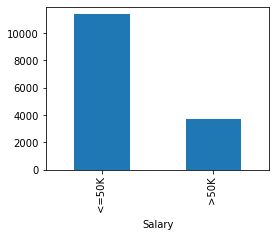

In [9]:
GroupedData=test_data.groupby('Salary').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Bar Interpretation - Categorical Data

In [12]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

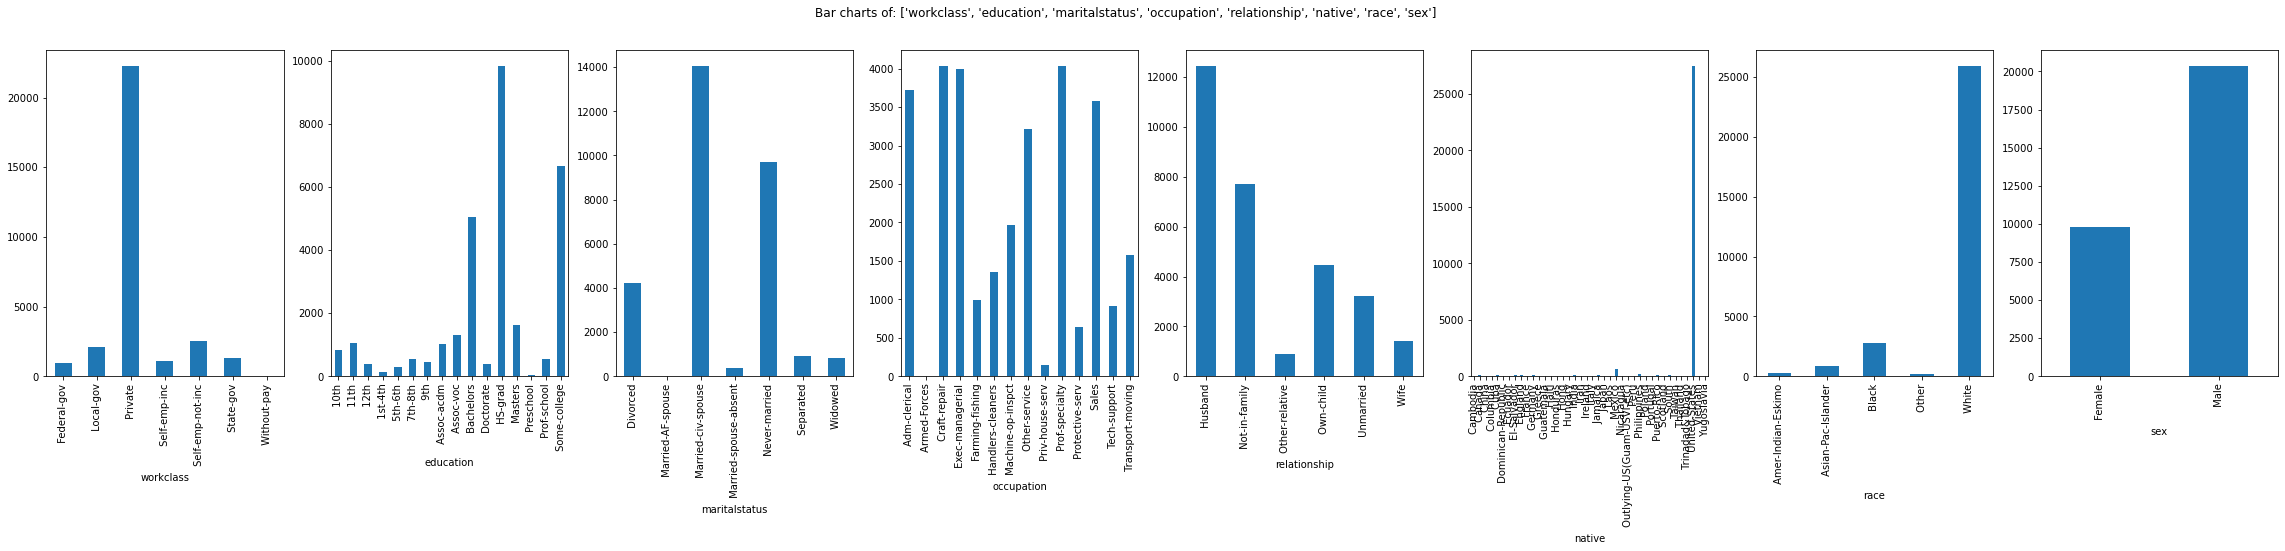

In [24]:
PlotBarCharts(inpData=train_data, colsToPlot=['workclass', 'education', 'maritalstatus','occupation','relationship','native','race','sex'])

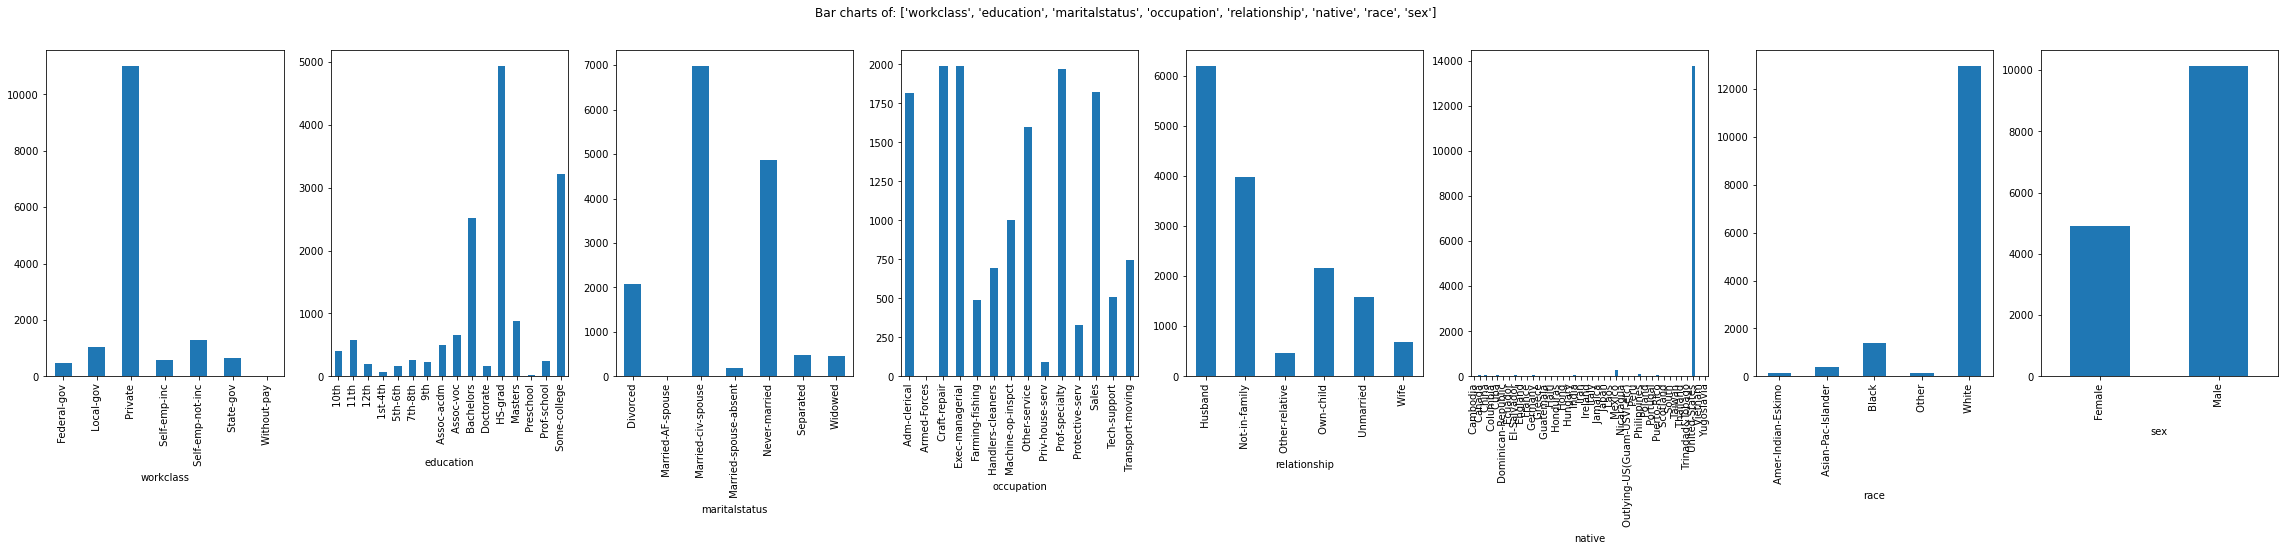

In [25]:
PlotBarCharts(inpData=test_data, colsToPlot=['workclass', 'education', 'maritalstatus','occupation','relationship','native','race','sex'])

### Histogram Interpretation - Continuous Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000135BF8A9430>,
      dtype=object)

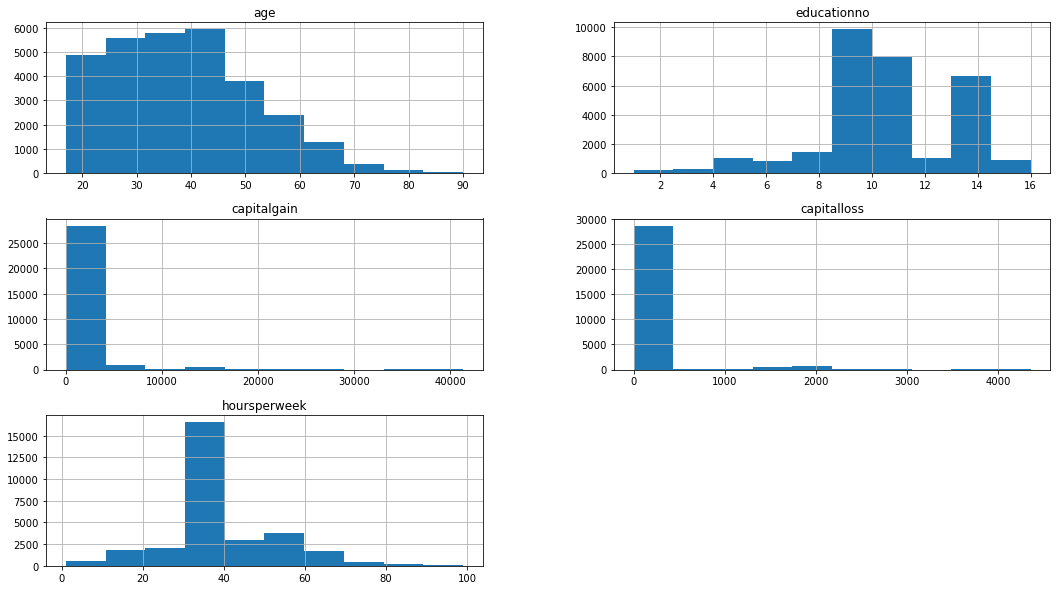

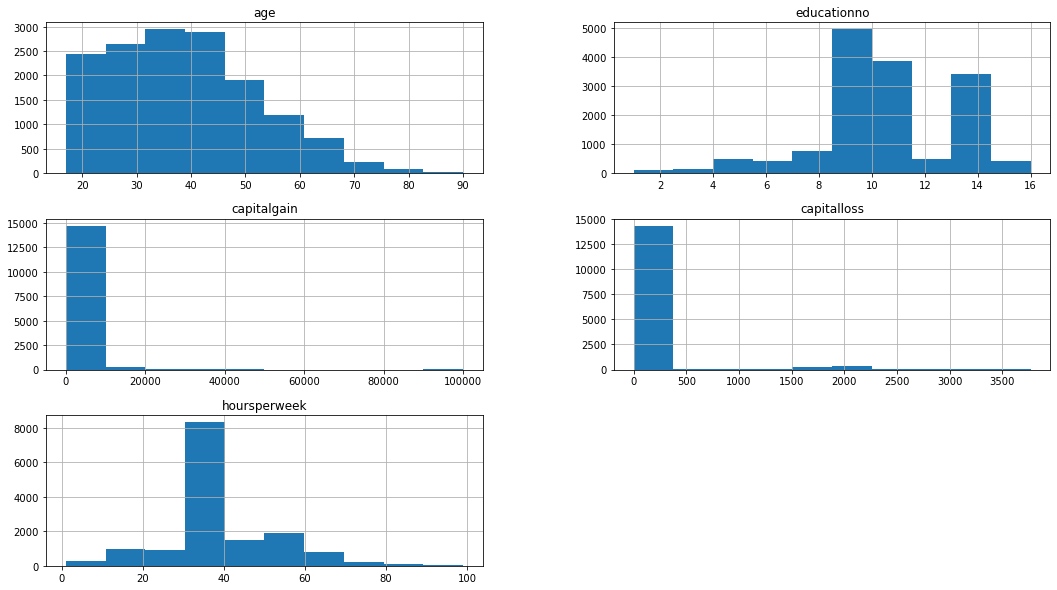

In [22]:
train_data.hist(['age','educationno','capitalgain','capitalloss','hoursperweek'], figsize=(18,10))
test_data.hist(['age','educationno','capitalgain','capitalloss','hoursperweek'], figsize=(18,10))

### Replacing the Outliers in Continuous Data Fields 

#### For capitalgain

In [5]:
train_data['capitalgain'][train_data['capitalgain']>40000].sort_values()

5918     41310
18697    41310
1145     99999
19630    99999
19908    99999
         ...  
10132    99999
10134    99999
10613    99999
11154    99999
30124    99999
Name: capitalgain, Length: 150, dtype: int64

In [6]:
train_data['capitalgain'][train_data['capitalgain']>40000] = 41310
test_data['capitalgain'][test_data['capitalgain']>40000] = 41310

<ipython-input-6-a266ba093487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['capitalgain'][train_data['capitalgain']>40000] = 41310
<ipython-input-6-a266ba093487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['capitalgain'][test_data['capitalgain']>40000] = 41310


In [7]:
test_data['capitalgain'][train_data['capitalgain']>40000].sort_values()

7038         0
10134        0
10132        0
10024        0
9955         0
         ...  
1406      3464
1482      3471
6536      7298
1145     10520
6986     41310
Name: capitalgain, Length: 74, dtype: int64

#### For capitalloss

In [8]:
train_data['capitalloss'][train_data['capitalloss']<1000].sort_values(ascending=False)

10209    974
6483     974
10575    880
4054     880
30107    880
        ... 
10053      0
10052      0
10051      0
10050      0
30160      0
Name: capitalloss, Length: 28769, dtype: int64

In [9]:
train_data['capitalloss'][train_data['capitalloss']>1000] = 974

<ipython-input-9-88c7c0a72664>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['capitalloss'][train_data['capitalloss']>1000] = 974


In [10]:
test_data['capitalloss'][test_data['capitalloss']<1000].sort_values(ascending=False)

6472     653
145      625
12194    625
12602    625
9604     625
        ... 
5031       0
5032       0
5033       0
5034       0
15059      0
Name: capitalloss, Length: 14356, dtype: int64

In [11]:
test_data['capitalloss'][test_data['capitalloss']>1000] = 653

<ipython-input-11-9bcc8b14165d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['capitalloss'][test_data['capitalloss']>1000] = 653


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278E10B47C0>,
      dtype=object)

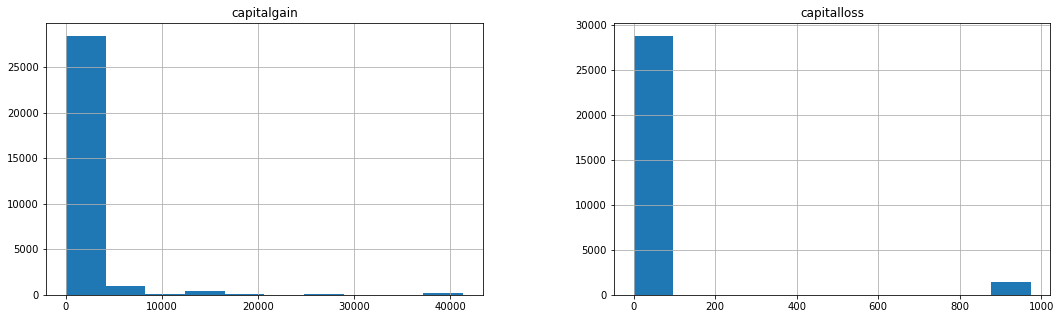

In [12]:
train_data.hist(['capitalgain','capitalloss'], figsize=(18,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278E11BA1C0>,
      dtype=object)

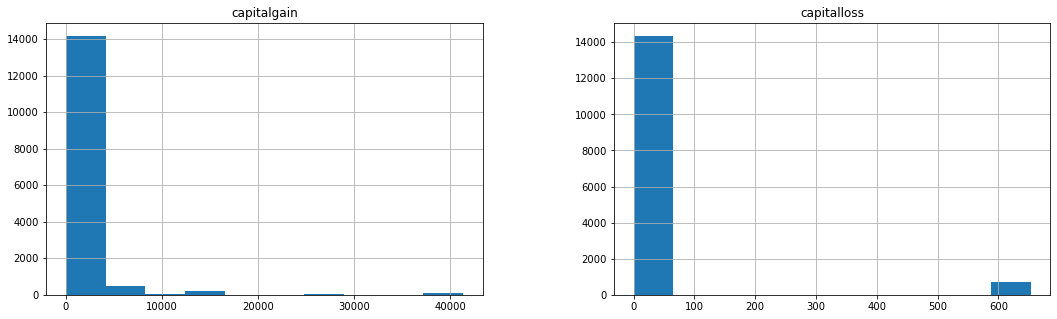

In [13]:
test_data.hist(['capitalgain','capitalloss'], figsize=(18,5))

In [14]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [38]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
salary = train_data , test_data

In [16]:
data = pd.concat(salary)

In [17]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [46]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,804.252493,40.708056,40.938038
std,13.217981,2.552909,3862.101674,185.912611,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,41310.000000,974.000000,99.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths

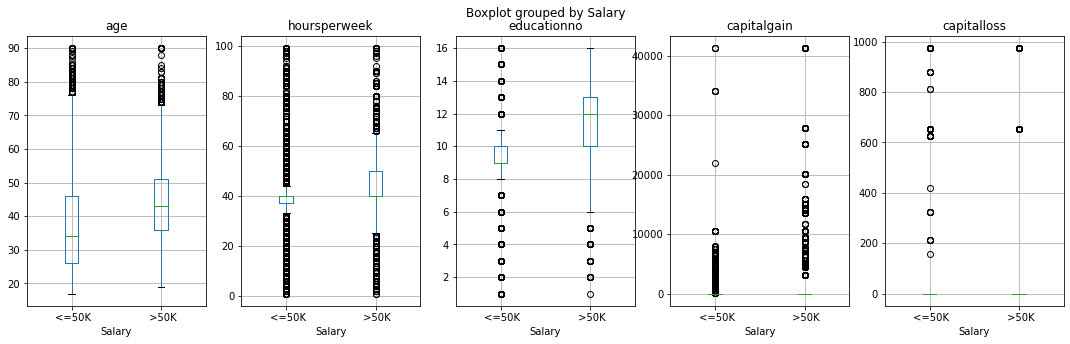

In [19]:
# Box plots for Categorical Target Variable "SalaryGT50K" and continuous predictors
ContinuousColsList=['age','hoursperweek','educationno','capitalgain','capitalloss']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "SalaryGT50K"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    data.boxplot(column=PredictorCol, by='Salary', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Feature Selection using ANOVA

In [20]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('****************************************  ANOVA Results ************************************** \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [52]:
ContinuousVariables=['age','hoursperweek','educationno','capitalgain','capitalloss']
FunctionAnova(inpData=data, TargetVariable='Salary', ContinuousPredictorList=ContinuousVariables)

****************************************  ANOVA Results ************************************** 

age is correlated with Salary | P-Value: 0.0
hoursperweek is correlated with Salary | P-Value: 0.0
educationno is correlated with Salary | P-Value: 0.0
capitalgain is correlated with Salary | P-Value: 0.0
capitalloss is correlated with Salary | P-Value: 7.191513908126466e-188


['age', 'hoursperweek', 'educationno', 'capitalgain', 'capitalloss']

In [21]:
CrossTabResult=pd.crosstab(index=data['maritalstatus'], columns=data['Salary'])
CrossTabResult

Salary,<=50K,>50K
maritalstatus,,
Divorced,5642,655
Married-AF-spouse,18,14
Married-civ-spouse,11491,9564
Married-spouse-absent,498,54
Never-married,13896,701
Separated,1312,99
Widowed,1156,121


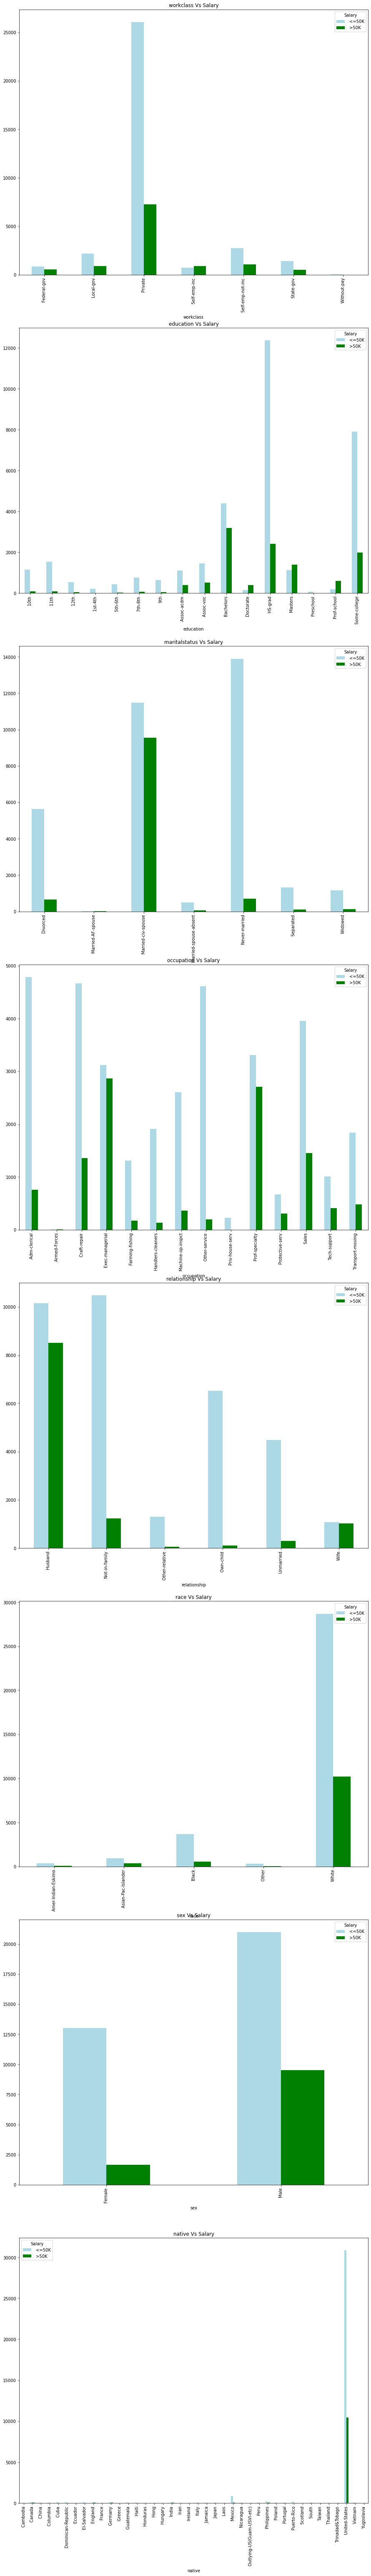

In [60]:
CategoricalColsList=['workclass', 'education', 'maritalstatus','occupation','relationship', 'race', 'sex','native']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,110))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "SalaryGT50K"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Salary'])
    CrossTabResult.plot.bar(color=['lightblue','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Salary')

### Feature Selection using Chi-Square

In [22]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [23]:
CategoricalVariables=['workclass', 'education', 'maritalstatus','occupation','relationship', 'race', 'sex']
# Calling the function
FunctionChisq(inpData=data,TargetVariable='Salary',CategoricalVariablesList= CategoricalVariables)

workclass is correlated with Salary | P-Value: 1.3457246272971519e-257
education is correlated with Salary | P-Value: 0.0
maritalstatus is correlated with Salary | P-Value: 0.0
occupation is correlated with Salary | P-Value: 0.0
relationship is correlated with Salary | P-Value: 0.0
race is correlated with Salary | P-Value: 1.356933859339362e-96
sex is correlated with Salary | P-Value: 0.0


['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex']

In [24]:
for var in CategoricalVariables: 
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels


In [25]:
train_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [26]:
test_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [27]:
train_data['sex'].replace({' Female':0, ' Male':1}, inplace=True)
test_data['sex'].replace({' Female':0, ' Male':1}, inplace=True)

In [32]:
Selected_columns = ['workclass', 'education', 'maritalstatus','occupation','relationship', 'race', 'sex','age','hoursperweek','educationno','capitalgain','capitalloss']

In [30]:
print(train_data.shape)
print(test_data.shape)

(30161, 14)
(15060, 14)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data[Selected_columns], train_data['Salary'], test_size=0.2, random_state=0)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24128, 12)
(6033, 12)
(24128,)
(6033,)


In [42]:
!pip install category_encoders

In [44]:
import category_encoders as ce
cat_encoder= ce.OneHotEncoder(cols=CategoricalVariables)
X_train= cat_encoder.fit_transform(X_train)
X_test= cat_encoder.fit_transform(X_test)
print(X_train.head())
print(X_test.head())
print(X_train.shape)
print(X_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


       workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  \
26840            1            0            0            0            0   
23346            1            0            0            0            0   
27598            1            0            0            0            0   
15646            1            0            0            0            0   
7455             1            0            0            0            0   

       workclass_6  workclass_7  education_1  education_2  education_3  ...  \
26840            0            0            1            0            0  ...   
23346            0            0            0            1            0  ...   
27598            0            0            0            1            0  ...   
15646            0            0            0            1            0  ...   
7455             0            0            1            0            0  ...   

       race_3  race_4  race_5  sex_1  sex_2  age  hoursperweek  educationno  \
2

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# GaussianNB is used in Binomial Classification
clf = GaussianNB()
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

In [47]:
# Measuring accuracy on Testing Data
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X_test , y_test, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

       <=50K       0.77      0.94      0.85      4559
        >50K       0.45      0.14      0.22      1474

    accuracy                           0.75      6033
   macro avg       0.61      0.54      0.53      6033
weighted avg       0.69      0.75      0.70      6033

[[4301  258]
 [1261  213]]
Accuracy of the model on Testing Sample Data: 0.7

Accuracy values for 10-fold Cross Validation:
 [0.80712402 0.7884586  0.77275716 0.79313703 0.78409554 0.81221706
 0.78201088 0.79030862 0.80395511 0.80782753]

Final Average Accuracy of the model: 0.79


In [48]:
from sklearn.naive_bayes import MultinomialNB
# MultinomialNB is used in multi-class classification
clf = MultinomialNB()
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

In [49]:
# Measuring accuracy on Testing Data
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X_test , y_test, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87      4559
        >50K       0.63      0.21      0.31      1474

    accuracy                           0.78      6033
   macro avg       0.71      0.58      0.59      6033
weighted avg       0.75      0.78      0.73      6033

[[4378  181]
 [1166  308]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.69379184 0.75125828 0.72633832 0.76479482 0.72382228 0.72992686
 0.73987894 0.72955446 0.72191655 0.73129299]

Final Average Accuracy of the model: 0.73


In [50]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

In [51]:
# Measuring accuracy on Testing Data
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X_test , y_test, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

       <=50K       0.76      0.99      0.86      4559
        >50K       0.13      0.00      0.01      1474

    accuracy                           0.75      6033
   macro avg       0.44      0.50      0.43      6033
weighted avg       0.60      0.75      0.65      6033

[[4533   26]
 [1470    4]]
Accuracy of the model on Testing Sample Data: 0.65

Accuracy values for 10-fold Cross Validation:
 [0.78172657 0.76995931 0.77189706 0.76773279 0.76791252 0.77275905
 0.75258642 0.74845049 0.76754605 0.77607689]

Final Average Accuracy of the model: 0.77
